# **Stock Price Prediction Model**
COSC 325 Course Project  
Fall 2024
## Members:
  * John Paul Saia  
  * Riley Taylor  
  * Shanna Wallace  

## Objective: 
Create a machine learning model to predict the stock's closing price in 7 days

## The Data
**Data set:** Berkshire Hathaway daily stock price and volume traded from 2015-01-02 to 2024-07-29  
**Format:** .csv file  

#### Target and features:

| Target | Description |
| :- | :- | 
| Close 7 Days | Closing price 7 days from the trading day |

<br>

  | Features | Description |
  | :- | :- | 
  | Date | The day the price data is from (yyyy-mm-dd) |
  | Open | Opening price | 
  | High | Highest price |
  | Low | Lowest price |
  | Close | Closing price |
  | Adj Close | Closing price after adjustments for applicable splits and dividend distributions |
  | Volume | Total number of shares traded that day |

## The Baseline Model
* Create and compare 3 regression models using 1 feature:
  * Linear Regression with SKLearn's default class
  * Complex regression model with polynomial expansion.  
  * Linear Regression with gradient descent.  
* Optimize linear model performance. 
<br>
## The Ensemble Model
* Random Forest

---  


# Create Linear Regression Model:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

## Load and Prepare Data:
* Load csv file contents to a DataFrame
* Add column for the target, Close 7 Days, by shifting Close by 7 days
* Add the additional features
* Clean the data by removing rows with missing values  

#### Additional Features:
| Features | Description |
| :- | :- | 
| High - Low | Difference between highest and lowest price |
| Open - Close | Amount price changed from open to close |
| 7 Day STD DEV | Standard deviation of closing price over previous 7 days |
| 7 Day MA | Moving averages of closing price over previous 7 days |
| 14 Day MA | Moving averages of closing price over previous 14 days |
| 21 Day MA | Moving averages of closing price over previous 21 days |  

In [2]:
RANDOM_STATE = 42
file = "./berkshire_hathaway_data.csv"
stock_data = pd.read_csv(file)

# Target is next day's closing price
# So want to target row i to correspond to row i-1 in feature columns
# Add a column called next day's close
stock_data['Close 7 Days'] = stock_data['Close'].shift(-7)

stock_data['Day'] = np.arange(1, len(stock_data.index)+1)
stock_data = stock_data[['Day', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close 7 Days']]


# Drop the rows with missing data
stock_data = stock_data.dropna().reset_index(drop=True)

stock_data.head()

,Day,Open,High,Low,Close,Volume,Close 7 Days
0,1,151.500000,151.600006,148.500000,149.169998,3436400,148.630005
1,2,148.809998,149.000000,146.779999,147.000000,4168800,147.820007
2,3,147.639999,148.529999,146.110001,146.839996,4116100,147.580002
3,4,147.940002,149.139999,147.649994,148.880005,4159100,149.210007
4,5,150.600006,151.369995,150.509995,151.369995,4282100,148.630005


## Change in Stock Prices Over Time

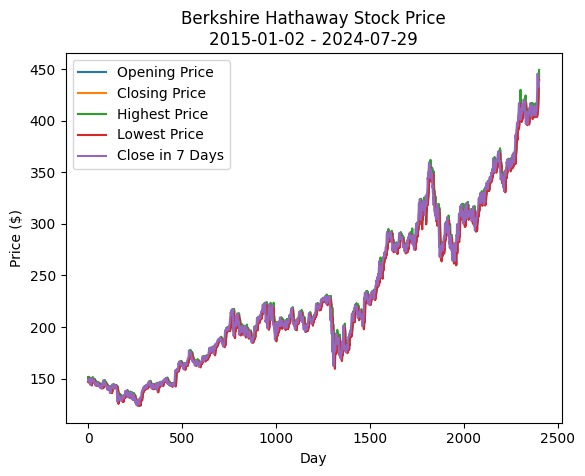

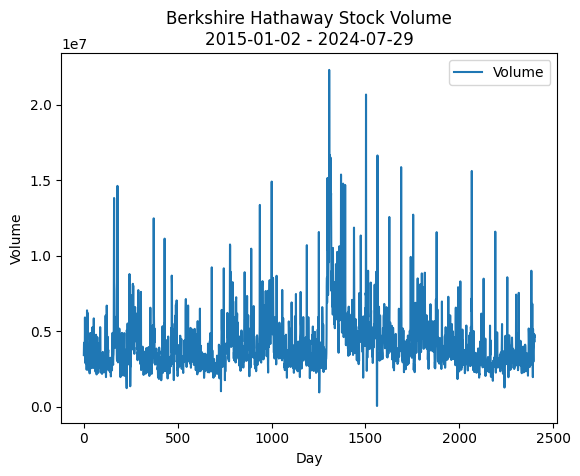

In [3]:
plt.plot(stock_data['Day'], stock_data['Open'], label="Opening Price")
plt.plot(stock_data['Day'], stock_data['Close'], label="Closing Price")
plt.plot(stock_data['Day'], stock_data['High'], label="Highest Price")
plt.plot(stock_data['Day'], stock_data['Low'], label="Lowest Price")
plt.plot(stock_data['Day'], stock_data['Close 7 Days'], label="Close in 7 Days")
plt.title("Berkshire Hathaway Stock Price\n2015-01-02 - 2024-07-29")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

plt.plot(stock_data['Day'], stock_data['Volume'], label="Volume")
plt.title("Berkshire Hathaway Stock Volume\n2015-01-02 - 2024-07-29")
plt.xlabel("Day")
plt.ylabel("Volume")
plt.legend()
plt.show()

### Create Training and Test Sets
* Extract target and selected features
* Split data in to training and testing sets
    * Training 80% / Testing 20%

In [4]:
# Drop relevant features that are highly correlated with each other
relevant_feature_list = ["Open", "Close", "High", "Low"]

X_relevant = stock_data[relevant_feature_list]
y = stock_data['Close 7 Days']

# Separate data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_relevant, y, test_size=0.2, random_state=RANDOM_STATE)

# Print our selected features and set sizes
print(f"Training set size: {X_train.shape[0]}\nTesting set size: {X_test.shape[0]}")


Training set size: 1920
Testing set size: 481


## Simple Linear Regression Model with OLS
### Create and Fit Linear Model using sklearn's default, Ordinary Least Squares

In [5]:
# Create the simple Model
ols_model = LinearRegression()

# Create training sets and train the model
ols_X_train = X_train
ols_X_test = X_test

ols_model.fit(ols_X_train, y_train)


LinearRegression()

### Get Predictions and Analyze Performance
* Plot the model
* Calculate performance metrics:
    * Bias
    * Variance
    * RMSE (Root Mean Squared Error)
    * MAE (Mean Absolue Error)

In [6]:
# simple_pred = simple_model.predict(simple_X_test)
ols_pred = pd.Series(ols_model.predict(X_test), index=X_test.index)

# Calculate the mean of the predictions (expected prediction)
ols_mean_pred = np.mean(ols_pred)

# Calculate bias, variance, and Root Mean Squared Error (RMSE) on the test set
ols_bias = np.mean((y_test - ols_mean_pred) ** 2)
ols_variance = np.mean((ols_pred - ols_mean_pred) ** 2)
ols_rmse = root_mean_squared_error(y_test, ols_pred)
ols_r2 = r2_score(y_test, ols_pred)
ols_mae = mean_absolute_error(y_test, ols_pred)


# Create Ensemble Model 
#### Implement a random forest model and visualize the first 3 trees. 

In [7]:
# Create random forest and print accuracy
forest_clf = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=3, n_estimators=100)
forest_clf.fit(X_train.values, y_train)
forest_pred = forest_clf.predict(X_test.values).reshape(-1, 1)

forest_score = forest_clf.score(X_test.values, y_test)
print(f"Random Forest Accuracy: {forest_score:,.4}")


Random Forest Accuracy: 0.9842


#### Visualize 3 trees from the random forest

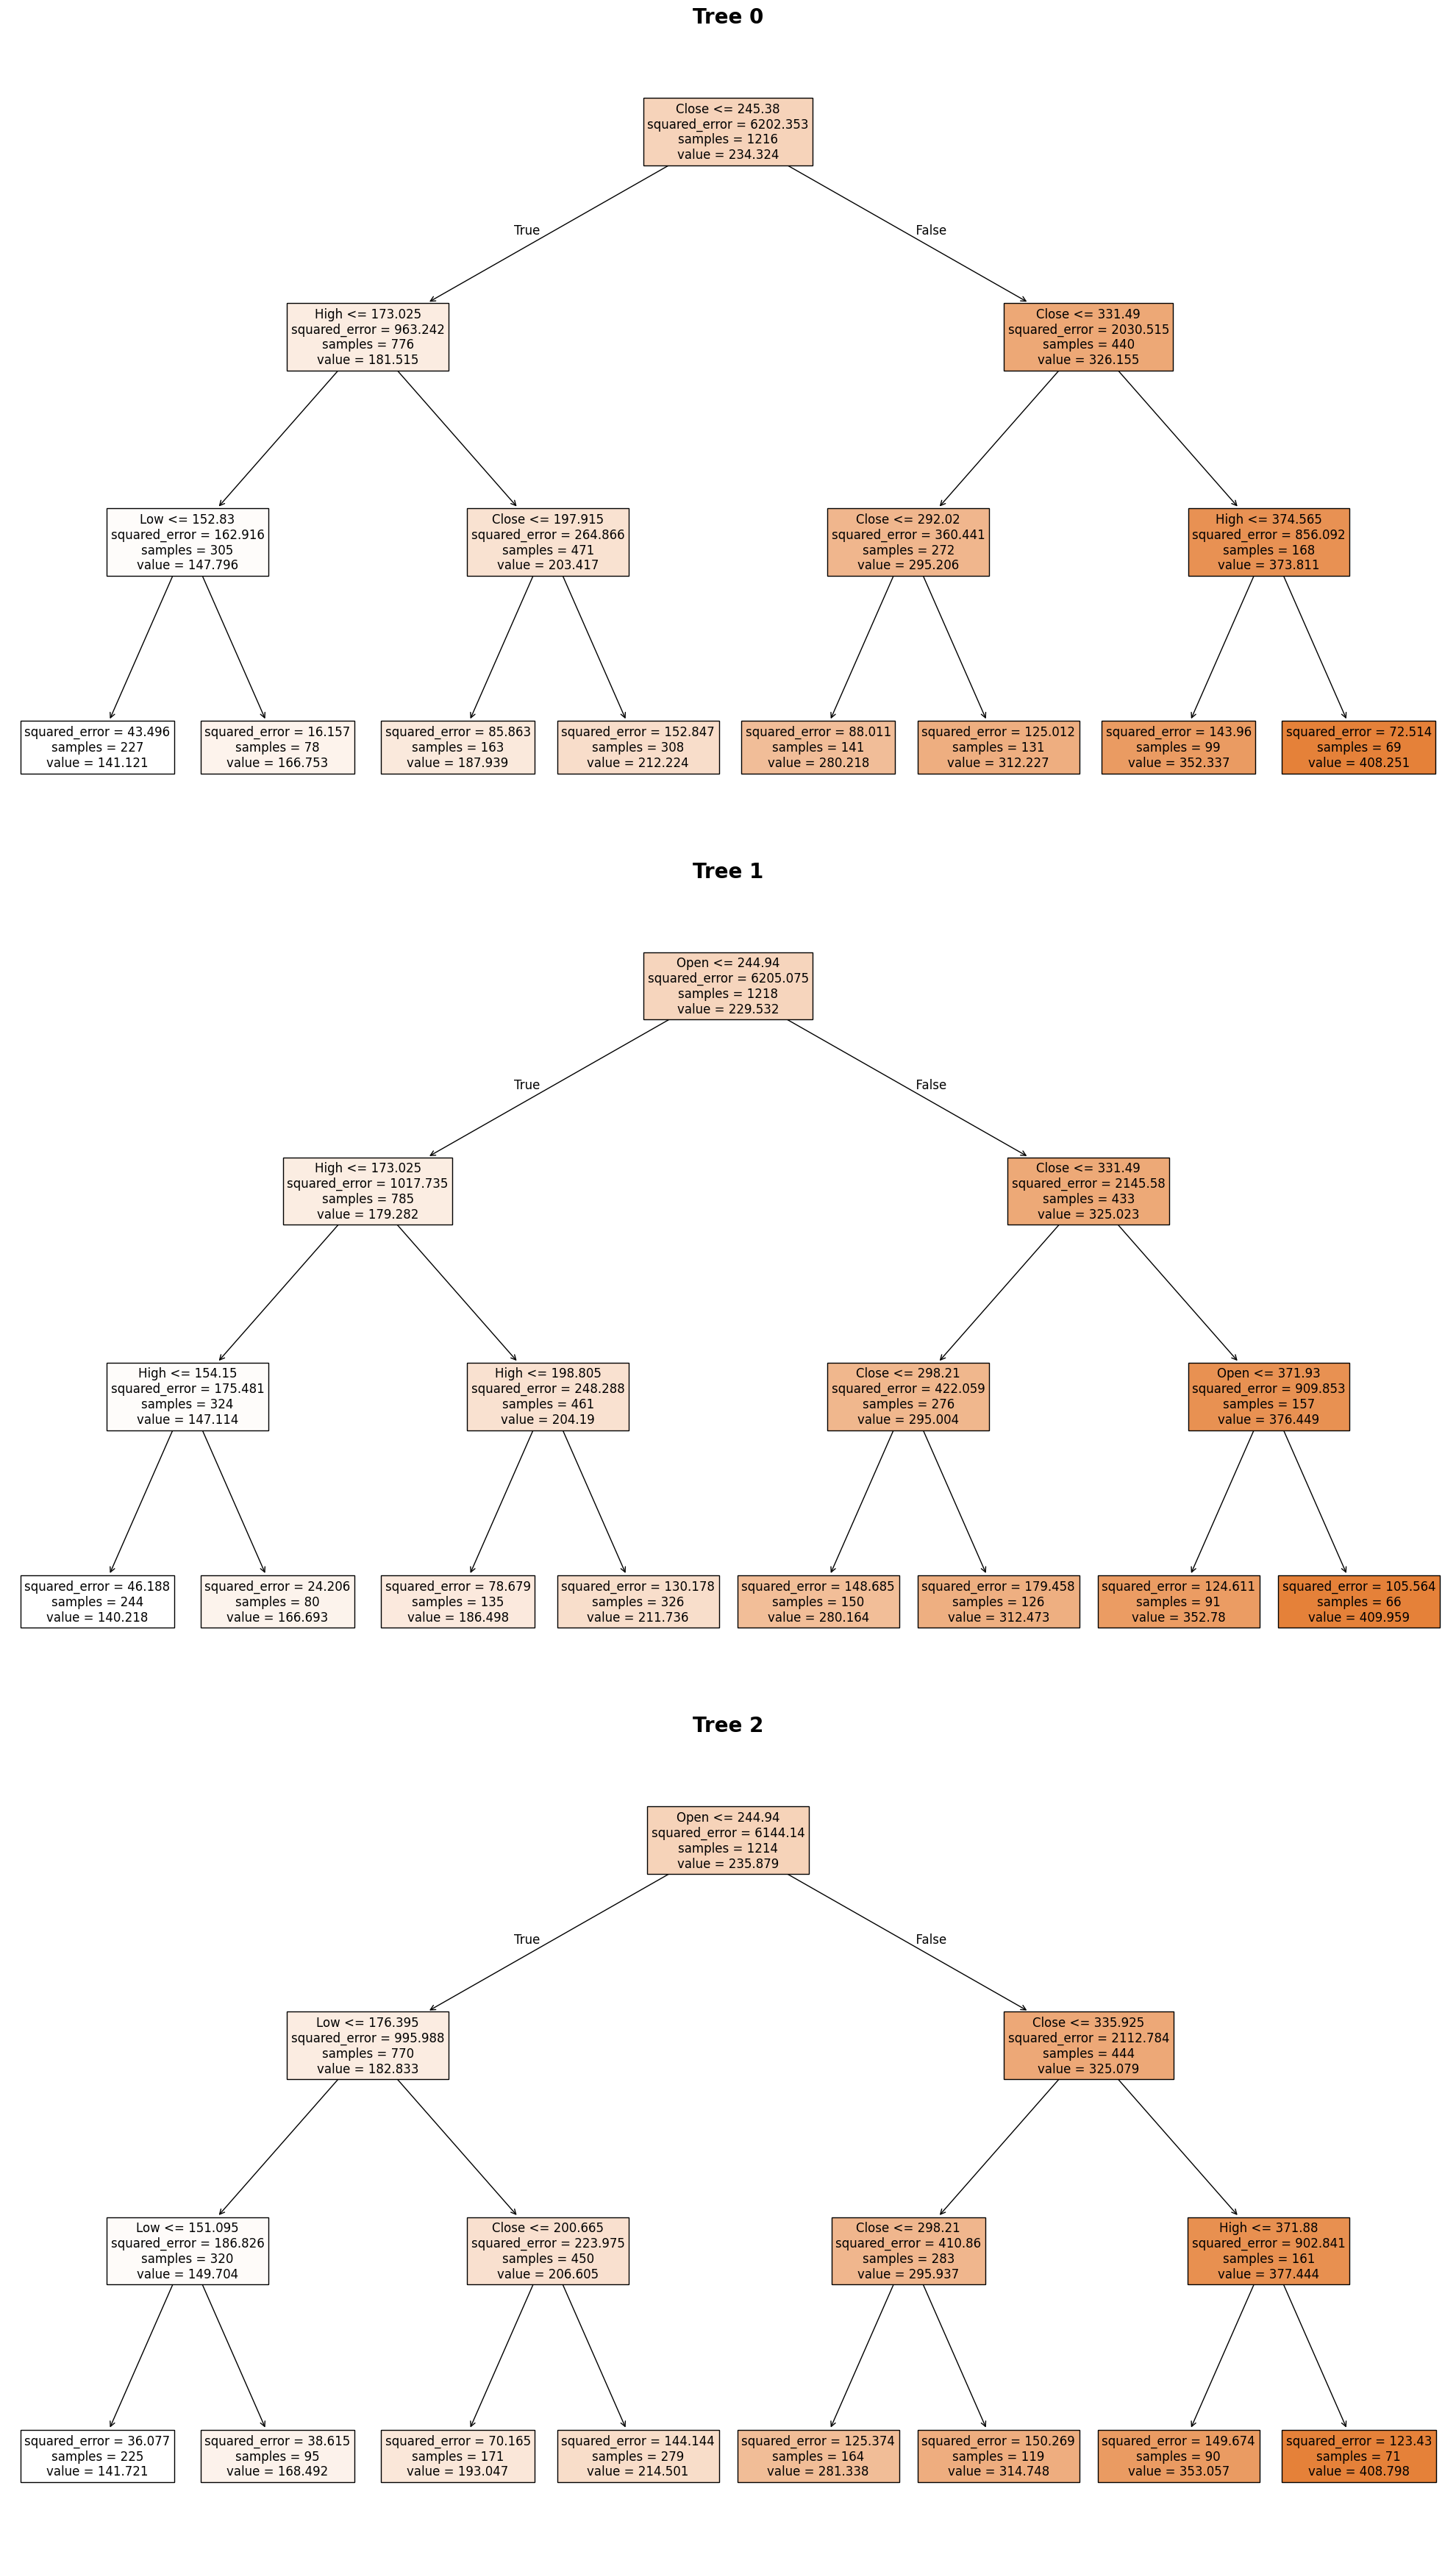

In [8]:

# Plot the first 3 trees
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 35))

# Plot each of the first 4 trees with larger font sizes
id_counter = 0
for i in range(3):  # Loop through the rows (since we are using a single column)
    ax = axes[i]
    plot_tree(forest_clf.estimators_[id_counter], ax = ax, 
            feature_names = relevant_feature_list, 
            filled = True, fontsize=12)  # Adjusted fontsize for readability
    ax.set_title(f"Tree {id_counter}", fontsize=20, fontweight = 'bold')  # Adjusted title font size and weight
    id_counter += 1

# Adjust layout
plt.tight_layout()
plt.show()

## K-folds Cross Validation


In [9]:
from sklearn.model_selection import KFold

def k_fold_cv(X, y, k, model):
    # Initialization:
    kf = KFold(n_splits=k, random_state=RANDOM_STATE, shuffle=True) # Initialize kfolds splitter
    cv_scores = [] # Initialize a placeholder for cv scores
    
    for train_indices, val_indices in kf.split(X):


        # Create training and validation folds:
        if hasattr(X, "iloc") & hasattr(y, "iloc") : # If X, y are dataframes
            X_train_fold, y_train_fold = X.iloc[train_indices], y.iloc[train_indices] # Obtain features and labels of samples in training fold of current iteration
            X_val_fold, y_val_fold = X.iloc[val_indices], y.iloc[val_indices] # Obtain features and labels of samples in validation fold of current iteration
        else: # If X is a numpy array
            X_train_fold, y_train_fold = X[train_indices], y[train_indices] # Obtain features and labels of samples in training fold of current iteration
            X_val_fold, y_val_fold = X[val_indices], y[val_indices] # Obtain features and labels of samples in validation fold of current iteration

        # Fit the model with training folds data
        model.fit(X_train_fold, y_train_fold)

        # Validate the model and compute validation score with validation folds data
        cv_scores.append(model.score(X_val_fold, y_val_fold))

    cv_scores = np.array(cv_scores) # Convert to numpy
    return cv_scores, np.mean(cv_scores), np.std(cv_scores)

In [10]:
# Initializations:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Hyperparameter space for the tree: deeper the max_depth, higher the capacity
train_scores = [] # List to store the training set scores (should be a length of `depths`, i.e. the number of experiments)
cv_means = [] # List to store the cross-validation scores (should be a length of `depths`, i.e. the number of experiments)
cv_stds = [] # List to store the cross-validation scores (should be a length of `depths`, i.e. the number of experiments)

for d in depths:

    # Construct the model of the "d" of current iteration
    tree = RandomForestRegressor(max_depth=d, random_state=RANDOM_STATE) # Initialize

    # Baseline: Fit model with training data
    tree.fit(X_train, y_train)  # Fit tree model with training data
    train_scores.append(tree.score(X_train, y_train))  # Add the training accuracy to list

    # Perform KFold CV:
    _, mean, std = k_fold_cv(X_train, y_train, 10, tree) # Call the function you wrote to perform KFold CV
    cv_means.append(mean)           # Add the mean CV score to list
    cv_stds.append(std)            # Add the standard deviation of CV scores to list

# Convert lists to numpy arrays
cv_means = np.array(cv_means)
cv_stds = np.array(cv_stds)

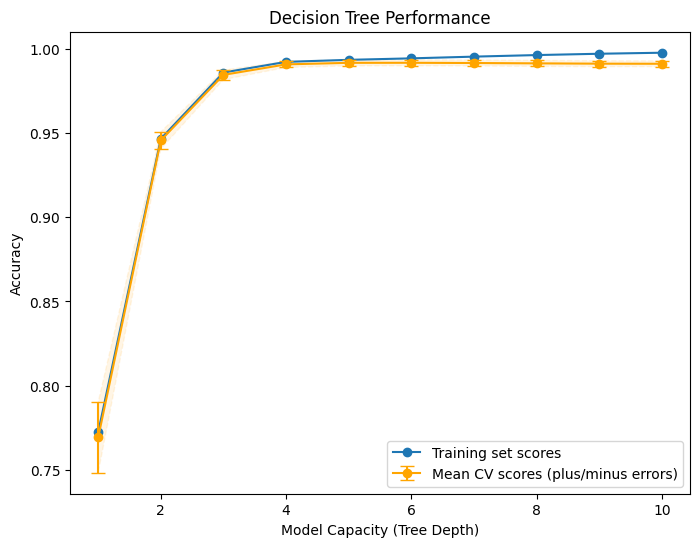

In [11]:
# Create the plot
plt.figure(figsize = (8, 6))

# Plot the line with error bars (standard deviation)
plt.plot(depths, train_scores, label = "Training set scores", marker = "o")
plt.errorbar(depths, cv_means, yerr = cv_stds, fmt = "-o", capsize = 5, label = "Mean CV scores (plus/minus errors)", color = "orange")
plt.fill_between(depths, 
                 cv_means + cv_stds, 
                 cv_means - cv_stds, 
                 linestyle = "--",
                 alpha = 0.1, color = "orange")

# Add labels and title
plt.xlabel("Model Capacity (Tree Depth)")
plt.ylabel("Accuracy")
plt.title("Decision Tree Performance")
# Display legend
plt.legend()
# Show the plot
plt.show()

In [13]:
# Best depth
best_depth = depths[np.argmax(cv_means)]
print(f"The best depth is {best_depth}")

The best depth is 6


## Feature Importance
* Extract feature importance measures from individual trees and the forest as a whole. 
* Visualize the mean feature importance measures given by the forest using Gini Impurity

mean: [np.float64(0.6291554216448219), np.float64(0.1186387267248717), np.float64(0.15098948576343743), np.float64(0.10121636586686902)]
std dev: [np.float64(0.3187539330853104), np.float64(0.16192696771775053), np.float64(0.19729157026077665), np.float64(0.2356817004008594)]
forest importances: [0.62915542 0.11863873 0.15098949 0.10121637]


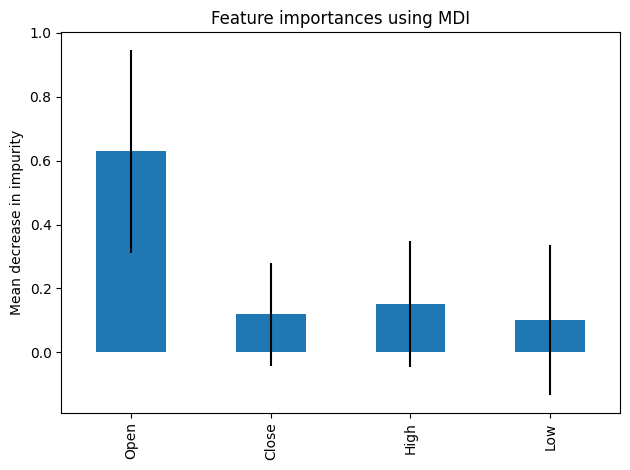

In [12]:
trees_importances = np.array([tree.feature_importances_ for tree in forest_clf.estimators_])

# feature importances measures from the forest
forest_importances = forest_clf.feature_importances_

# Compute mean feature importances for each feature
mean_importances = [column.mean() for column in trees_importances.T]
# Compute standard deviation feature importances for each feature
std_importances = [column.std() for column in trees_importances.T]

print(f"mean: {mean_importances}\nstd dev: {std_importances}\nforest importances: {forest_importances}")


forest_importances = pd.Series(forest_importances, index = relevant_feature_list)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = std_importances, ax = ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
